In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
#Función dada.
def distribution_fuc(x,gamma):
    return (10/(np.pi*gamma))*(gamma**2/(x**2+gamma**2))

#Esta es la función normalizada de la función dada.
def norm_distribution_fuc(x,gamma):
    return ((1/(np.pi*gamma))*(gamma**2/(x**2+gamma**2)))

#F(x)
def cumulative_dis_func(x):
    return (1/np.pi)*np.arctan(x/2)

#F-1(x)
def inv_cumulative_dis_func(u):
    return 2*np.tan(u*np.pi)

#Generador de números aletorios - Analytical approach: inversion method.
def rand():
    u = np.random.random()
    return inv_cumulative_dis_func(u)

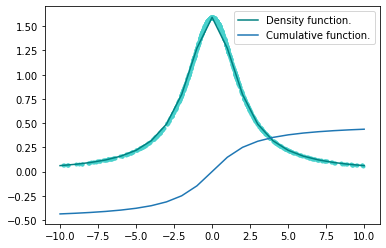

In [3]:
#Gráficas y pruebas.
x = np.linspace(-10,10,21)
random_n = []
y_ran = []

for i in range(0,1000):
    new_r = rand()
    if(new_r<10 and new_r>-10):
        random_n.append(new_r)
        y_ran.append(distribution_fuc(new_r,2))

plt.plot(x,distribution_fuc(x,2),color="teal",label="Density function.") 
plt.scatter(random_n,y_ran,marker='.',color="mediumturquoise")
plt.plot(x,cumulative_dis_func(x),label="Cumulative function.")
plt.legend()

In [4]:
#Gaussian distribution.
def gaussian_dist(x,sigma,mu):
    return (1/np.sqrt(2*np.pi*(sigma**2)))*np.exp(-((x-mu)**2)/(2*(sigma**2)))

#Box-Muller generator to obtain Gaussian distribution.
def Box_Muller():
    u1 = np.random.random()
    a = 2*np.pi*u1
    u2 = np.random.random()
    r = np.sqrt(-2*np.log(1-u2))
    x = r*np.cos(a)
    y = r*np.sin(a)
    return x,y

#Generador de números aleatorios - Combined analytical + rejection method.
def rand2():
    x = Box_Muller()[0]
    y = 100
    while(y > norm_distribution_fuc(x,2)): 
        u = np.random.random()
        x = Box_Muller()[1]
        y = gaussian_dist(x,1,0) * np.random.random()
    return x,y

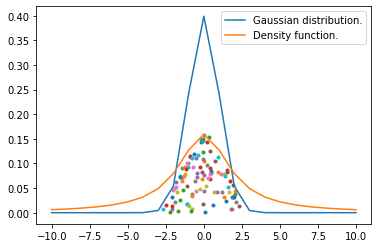

In [5]:
plt.plot(x,gaussian_dist(x,1,0),label="Gaussian distribution.")
plt.plot(x,norm_distribution_fuc(x,2), label = "Density function.")
for i in range (0,100):
    x,y = rand2()
    plt.scatter(x,y,marker='.')
plt.legend()
plt.show()